In [10]:
import pandas as pd
import numpy as np
import pickle

import math
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
# Set font file path
font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
# font_path = '/data/wangyuhang/ttf/ARIAL.TTF'
font = FontProperties(fname=font_path, size=12)

from collections import Counter
from itertools import chain
from scipy.optimize import curve_fit
import powerlaw

from rapidfuzz import process, fuzz
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('/data/huggingface/hub/sentence-transformers_all-MiniLM-L6-v2')
import oracledb
connection = oracledb.connect(user="", password="", host="",port=,service_name="")

import oracledb
from sqlalchemy import create_engine
import cx_Oracle
from tqdm import tqdm

from matplotlib.font_manager import FontProperties

from sentence_transformers.util import cos_sim
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from powerlaw import Fit, plot_pdf

from tqdm import tqdm
import re
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve,precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from aquarel import load_theme
import matplotlib.pyplot as plt
import numpy as np
theme = load_theme("arctic_light") #调用aquarel中的'arctic_dark',"arctic_light"
#调用aquarel
# theme.apply()

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# 下载NLTK的punkt数据
nltk.download('punkt')
stemmer = PorterStemmer()
def get_dict(x,dictionary):
    return [dictionary[str(item)] for item in x]
def get_larger(x,number):
    return [item for item in x if item>number]
def compare_larger(x,number):
    return any([item>number for item in x])
def convert_date(x):
    try:
        date=pd.Timestamp(x)
    except:
        date=pd.Timestamp(x.split('-')[0]+'-01-01')
    return date
def Word_overlap_score(x, y):
    # Add a check to ensure x and y are strings
    if not isinstance(x, str) or not isinstance(y, str):
        return 0  # or any other value that makes sense in your context

    token_x = [stemmer.stem(token) for token in word_tokenize(x)]
    token_y = [stemmer.stem(token) for token in word_tokenize(y)]
    return len([i for i in token_x if i in token_y])
with open('model/model_5','rb') as f:
    Logistic_model=pickle.load(f)

[nltk_data] Error loading punkt: <urlopen error [Errno 111] Connection
[nltk_data]     refused>


In [5]:
def convert_date(x):
    try:
        date=pd.Timestamp(x)
    except:
        date=pd.Timestamp(x.split('-')[0]+'-01-01')
    return date

In [6]:
df_record=pd.read_pickle('data/df_record.pickle')
# del df_record['title_embedding']
df_record.loc[df_record['appln_id'].notnull(), 'appln_id'] = df_record.loc[df_record['appln_id'].notnull(), 'appln_id'].astype(int).astype(str)

In [7]:
with open('labels.pickle', 'rb') as f:
    labels=pickle.load(f)
df_record['labels']=labels


In [8]:
df_record[df_record['source_id'].notnull()]

,appln_id,title,eid,doi,source_id,title_embedding,labels
6575537,NaN,Feasibility of dairy waste water (Dww) and dis...,2-s2.0-84885470695,10.1007/s13205-012-0053-9,2.110045e+10,"[0.040534277, -0.030746296, -0.03129141, 0.025...",-1
6575538,NaN,Comparative assessment for hyperaccumulatory a...,2-s2.0-84938362137,10.1007/s13205-014-0194-0,2.110045e+10,"[0.06987196, -0.048892897, -0.062456492, 0.030...",-1
6575539,NaN,Specific oligonucleotide primers for detection...,2-s2.0-85043225336,10.1007/s13205-013-0177-6,2.110045e+10,"[-0.009620416, -0.050137706, -0.015161652, -0....",-1
6575540,NaN,"Over-expression, purification and isotopic lab...",2-s2.0-85043225181,10.1007/s13205-013-0181-x,2.110045e+10,"[-0.017796384, 0.017425884, -0.08267693, 0.011...",-1
6575541,NaN,Micropropagation of Ficus religiosa L. via lea...,2-s2.0-85039794987,10.1007/s13205-013-0175-8,2.110045e+10,"[0.042765282, -0.062503144, -0.08253564, 0.046...",-1
...,...,...,...,...,...,...,...
29545075,NaN,Relative expression of the developmentally imp...,2-s2.0-85125811955,10.1017/S0967199421000976,1.907300e+04,"[-0.0929608, -0.021178935, -0.072981216, -0.01...",3356
29545076,NaN,Advancements in mammalian X and y sperm differ...,2-s2.0-85125791972,10.1017/S0967199421000939,1.907300e+04,"[-0.0072978716, 0.015270151, -0.031556655, -0....",-1
29545077,NaN,Effect of melatonin on the clinical outcome of...,2-s2.0-85125769983,10.1017/S0967199421000770,1.907300e+04,"[0.026419124, 0.049893636, 0.032035816, 0.0320...",-1
29545078,NaN,Expression of genes associated with fertility ...,2-s2.0-85123940284,10.1017/S0967199421000745,1.907300e+04,"[-0.010753157, -0.07279501, -0.026000984, 0.06...",-1


In [9]:
df_journal_list=pd.read_excel('data/extlistMarch2023.xlsx',sheet_name='Scopus Sources October 2022')
df_journal_list=df_journal_list[df_journal_list['1300\nBiochemistry, Genetics and Molecular Biology'].notnull()|
               df_journal_list['2400\nImmunology and Microbiology'].notnull()|
                df_journal_list['2700\nMedicine'].notnull()|
                df_journal_list['3000\nPharmacology, Toxicology and Pharmaceutics'].notnull()
               ]
df_journal_list

,Sourcerecord ID,Source Title (Medline-sourced journals are indicated in Green),Print-ISSN,E-ISSN,Active or Inactive,Coverage,Titles discontinued by Scopus due to quality issues,Article language in source (three-letter ISO language codes),2021\nCiteScore,Medline-sourced Title? (see more info under separate tab),...,2700\nMedicine,2800\nNeuroscience,2900\nNursing,"3000\nPharmacology, Toxicology and Pharmaceutics",3100\nPhysics and Astronomy,3200\nPsychology,3300\nSocial Sciences,3400\nVeterinary,3500\nDentistry,3600\nHealth Professions
2,21100447128,3 Biotech,2190572X,21905738,Active,"2014-ongoing, 2012",NaN,ENG,4.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21100932761,3D Printing in Medicine,NaN,23656271,Active,2019-ongoing,NaN,ENG,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,21100399164,A&A case reports,23257237,NaN,Inactive,2015-2017,NaN,ENG,NaN,Medline-sourced,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,21100881366,A&A practice,NaN,25753126,Active,2018-ongoing,NaN,ENG,0.9,Medline-sourced,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,19600162043,A.M.A. American Journal of Diseases of Children,00968994,NaN,Inactive,1945-1955,NaN,NaN,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43389,79328,Zucker,0044538X,NaN,Inactive,1973-1977,NaN,NaN,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43391,61333,Zurcher medizingeschichtliche Abhandlungen,05144264,NaN,Inactive,"1999-2002, 1994-1996",NaN,NaN,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43395,24168,ZWR,0044166X,NaN,Inactive,1970-1991,NaN,NaN,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43397,19073,Zygote,09671994,14698730,Active,1993-ongoing,NaN,ENG,3.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_journal_list=df_journal_list[df_journal_list['Sourcerecord ID'].isin(df_record['source_id'])]
df_journal_list.to_csv('data/df_journal_list.csv',encoding='utf-8-sig')
df_journal_list

,Sourcerecord ID,Source Title (Medline-sourced journals are indicated in Green),Print-ISSN,E-ISSN,Active or Inactive,Coverage,Titles discontinued by Scopus due to quality issues,Article language in source (three-letter ISO language codes),2021\nCiteScore,Medline-sourced Title? (see more info under separate tab),...,2700\nMedicine,2800\nNeuroscience,2900\nNursing,"3000\nPharmacology, Toxicology and Pharmaceutics",3100\nPhysics and Astronomy,3200\nPsychology,3300\nSocial Sciences,3400\nVeterinary,3500\nDentistry,3600\nHealth Professions
2,21100447128,3 Biotech,2190572X,21905738,Active,"2014-ongoing, 2012",NaN,ENG,4.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21100932761,3D Printing in Medicine,NaN,23656271,Active,2019-ongoing,NaN,ENG,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,21100399164,A&A case reports,23257237,NaN,Inactive,2015-2017,NaN,ENG,NaN,Medline-sourced,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,21100881366,A&A practice,NaN,25753126,Active,2018-ongoing,NaN,ENG,0.9,Medline-sourced,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,28033,AAC: Augmentative and Alternative Communication,07434618,14773848,Active,1985-ongoing,NaN,ENG,4.4,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Health Professions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43365,19700173308,Zoological Research,20958137,NaN,Active,2010-ongoing,NaN,ENG,6.2,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43376,6200180171,Zoomorphologie,03406725,NaN,Inactive,1975-1980,NaN,NaN,NaN,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43377,14981,Zoomorphology,0720213X,1432234X,Active,1980-ongoing,NaN,ENG,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43378,5200153105,Zoonoses and Public Health,18631959,18632378,Active,2007-ongoing,NaN,ENG,5.2,NaN,...,Medicine,NaN,NaN,NaN,NaN,NaN,NaN,Veterinary,NaN,NaN


In [11]:
df_sample=df_record.sample(n=100000,random_state=42)
df_sample

,appln_id,title,eid,doi,source_id,title_embedding,labels
12519114,NaN,Epidermal growth factor receptor inconsistency...,2-s2.0-84954578203,10.7754/Clin.Lab.2015.150330,25446.0,"[0.112061836, -0.06878886, -0.003340074, -0.02...",-1
14894267,NaN,Imaging of the knee joint with emphasis on mag...,2-s2.0-0009099124,10.1007/BF00171390,16687.0,"[-0.0466047, -0.006699533, -0.048303325, -0.06...",4179
13442705,NaN,Treatment concepts in complex genital prolaps,2-s2.0-0033994760,10.1007/s001290050545,27460.0,"[-0.0337524, 0.07208032, -0.073507346, -0.0280...",3271
19387959,NaN,Intraoperative neurophysiologic monitoring in ...,2-s2.0-67649394868,10.1097/WNP.0b013e31819f9058,16675.0,"[-0.007351542, -0.091771066, 0.103767045, 0.00...",1094
23444935,NaN,The naturally competent strain Streptococcus t...,2-s2.0-84903585789,10.1186/1475-2859-13-82,18593.0,"[-0.036543556, -0.09879638, -0.079891294, -0.0...",-1
...,...,...,...,...,...,...,...
11913643,NaN,Combining tricuspid valve repair with double l...,2-s2.0-80053494363,10.1378/chest.10-2929,18429.0,"[-0.036426432, 0.03281372, -0.030608699, -0.02...",-1
8747347,NaN,Distribution of Giardia duodenalis genotypes a...,2-s2.0-2942595718,10.1128/AEM.70.6.3776-3780.2004,19618.0,"[0.032399084, -0.04064714, 0.012523609, -0.039...",-1
15935935,NaN,Genetic relatedness of human DNA polymerase β ...,2-s2.0-0023553149,10.1016/0378-1119(87)90224-1,15636.0,"[-0.08321018, -0.0006420965, -0.08944714, 0.02...",-1
12245964,NaN,The advantage of phenylalanine to tyrosine rat...,2-s2.0-0032559574,10.1016/S0009-8981(97)00191-5,29286.0,"[0.021927075, -0.050084963, -0.031718746, -0.0...",1956


In [12]:
df_record=df_record[df_record['labels']!=-1]

In [13]:
df_sample=df_record.sample(n=100000,random_state=42)
df_sample

,appln_id,title,eid,doi,source_id,title_embedding,labels
24870588,NaN,Patterns of Eating Disorder Pathology are Asso...,2-s2.0-85035009013,10.1002/oby.22028,4.700153e+09,"[-6.192838e-05, 0.043225758, -0.003210562, 0.0...",1652
21633085,NaN,"Intraosseous ""Lipoma"" of the calcaneus develop...",2-s2.0-85062016416,10.3941/jrcr.v12i12.3263,1.960016e+10,"[-0.028886301, -0.014892629, -0.0022446103, -0...",1188
11368321,NaN,Long noncoding rna linc00173 promotes nutf2 ex...,2-s2.0-85090374976,10.2147/CMAR.S262279,1.970018e+10,"[-0.018855894, -0.09721549, -0.044848047, -0.0...",2926
16396376,NaN,Association of left atrial epicardial adipose ...,2-s2.0-85016425356,10.1016/j.hrthm.2016.08.030,2.324600e+04,"[-0.007803667, -0.014369006, 0.00713597, 0.115...",3671
28455865,NaN,Moral perception and the pursuit of medical ph...,2-s2.0-0032806004,10.1023/A:1009929632148,1.965900e+04,"[0.02235905, 0.05775725, -0.12186862, -0.04595...",4288
...,...,...,...,...,...,...,...
17705697,NaN,Reciprocal activation of HEY1 and NOTCH4 under...,2-s2.0-85099304008,10.3892/ijo.2020.5156,2.990300e+04,"[-0.03245884, 0.043133307, 0.016185902, -0.042...",2977
6222391,442766883,Intelligent feeding bottle sleeve and weighing...,NaN,NaN,NaN,"[-0.114998005, 0.10008205, -0.03853085, 0.0092...",1812
5591520,521771014,WALK SUPPORTING APPARATUS USING ELASTIC MATERIAL,NaN,NaN,NaN,"[-0.07501901, -0.007960471, -0.008899286, -0.0...",3088
22266775,NaN,Prophylactic cranial irradiation in non-small ...,2-s2.0-85065167535,10.21037/jtd.2018.12.119,2.110020e+10,"[0.06847604, 0.12234799, -0.032376178, -0.0487...",926


In [38]:
del df_record

In [2]:
# df_sample.to_pickle('df_sample.pickle')
df_sample=pd.read_pickle('df_sample.pickle')

In [3]:
import umap.umap_ as umap
# 方案2 umap再降维 hdbsacn聚类
embedding_2d = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(df_sample['title_embedding'].tolist())

/home/wangyuhang/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [4]:
df_sample['x']=embedding_2d[:,0]
df_sample['y']=embedding_2d[:,1]

In [5]:
sum(df_sample.groupby(['labels'])['appln_id'].count().sort_values())

22247

In [6]:
pd.DataFrame(Counter(df_sample['labels']).most_common(n=21))

,0,1
0,-1,60117
1,4687,764
2,101,476
3,112,453
4,142,414
5,2926,285
6,3427,210
7,515,196
8,2687,189
9,4655,169


In [7]:
df_sample=df_sample[(df_sample['x']>0)&(df_sample['x']<18)]
df_sample=df_sample[(df_sample['y']>0)&(df_sample['y']<18)]


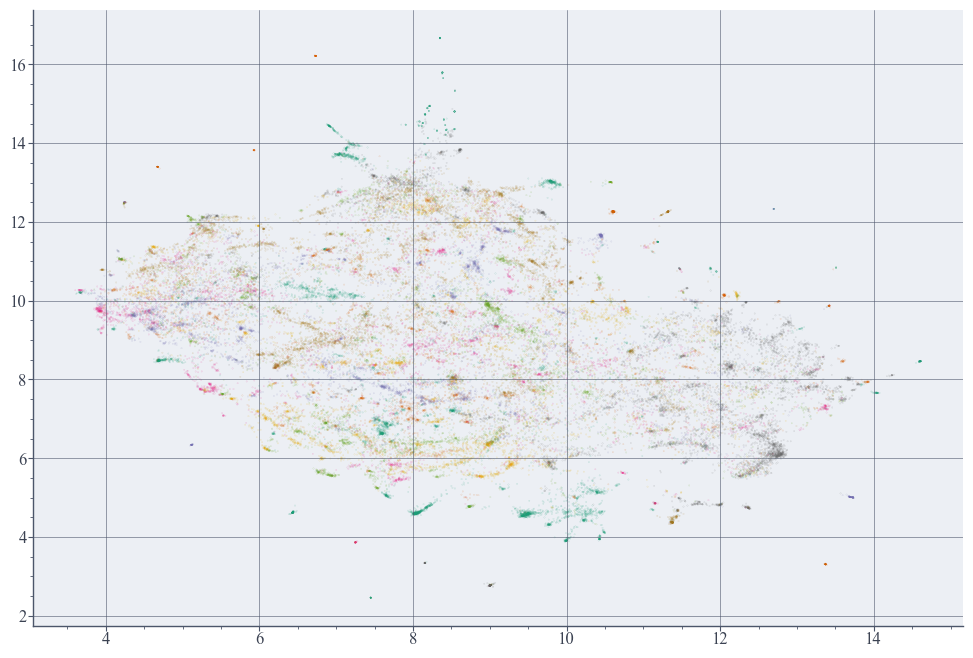

In [24]:
# 提取数据
labels = df_sample[df_sample['labels']!=-1]['labels']
x = df_sample[df_sample['labels']!=-1]['x']
y = df_sample[df_sample['labels']!=-1]['y']

labels_grey = df_sample[df_sample['labels']==-1]['labels']
x_grey = df_sample[df_sample['labels']==-1]['x']
y_grey = df_sample[df_sample['labels']==-1]['y']

plt.figure(figsize=(12, 8))

# # 绘制散点图
plt.scatter(x, y, c=labels, cmap='Dark2', alpha=0.6, s=0.01)
# # plt.scatter(x_grey, y_grey,  c='grey', alpha=0.6, s=0.01)

# # 添加标题和标签
# # plt.title('Scatter Plot')
# plt.xlabel('X-axis', fontproperties=font)
# plt.ylabel('Y-axis', fontproperties=font)
plt.xticks(fontproperties = font)
plt.yticks(fontproperties = font)
# # 显示颜色条
# # plt.colorbar()
plt.savefig('image/cluster plot.png', format='png', bbox_inches='tight')
plt.savefig('image/cluster plot.jpg', format='jpg', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()